<a href="https://colab.research.google.com/github/chadeowen/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/ChadOwen_LS_DS_143_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

$x = 2$ is an inline equation.

$$
x = 2
$$

is a block equation.

$$
\begin{aligned}
x &= 2 \\
&= 1 + 1
\end{aligned}
$$

Now let's derive Bayes!

$$
\begin{aligned}
P(A \cap B) &= P(B \cap A) \\
\\
P(A|B) &= \frac{P(A \cap B)}{P(B)} \\
\Rightarrow P(A|B)P(B) &= P(A \cap B) \\
P(B|A) &= \frac{P(B \cap A)}{P(A)} \\
\Rightarrow P(B|A)P(A) &= P(B \cap A) = P(A \cap B) \\
\Rightarrow P(A|B)P(B) &= P(B|A)P(A) \\
\Rightarrow P(A|B)&= \frac{P(B|A)P(A)}{P(B)}
\end{aligned}
$$

In [1]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs

from scipy import stats
import numpy as np

coinflips = np.random.binomial(n=1, p=0.5, size=100)
print(coinflips)

[1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1]


In [2]:
# Frequentist approach (from yesterday)
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

confidence_interval(coinflips)

(0.51, 0.41030929062808247, 0.6096907093719175)

In [3]:
import pandas as pd
pd.DataFrame(coinflips).describe()

,0
count,100.000000
mean,0.510000
std,0.502418
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [4]:
stats.bayes_mvs(coinflips)

(Mean(statistic=0.51, minmax=(0.42657889423317225, 0.5934211057668277)),
 Variance(statistic=0.2576288659793814, minmax=(0.20279939208271736, 0.32435028891692574)),
 Std_dev(statistic=0.506265071182084, minmax=(0.45033253500354303, 0.5695175931583902)))

In [5]:
# Let's do something else medical
import random

# We have two groups of people, one treated one non-treated
# Treated people recover with probability 0.65
# Non-treated people recover with probability 0.4
treatment_group = np.random.binomial(n=1, p=0.65, size=40)
nontreated_group = np.random.binomial(n=1, p=0.4, size=40)

print(treatment_group)

[0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0
 1 1 0]


In [6]:
import pandas as pd
df = pd.DataFrame({'treated': treatment_group,
                   'untreated': nontreated_group})
df.describe()

,treated,untreated
count,40.00000,40.000000
mean,0.62500,0.400000
std,0.49029,0.496139
min,0.00000,0.000000
25%,0.00000,0.000000
50%,1.00000,0.000000
75%,1.00000,1.000000
max,1.00000,1.000000


In [7]:
df.head()

,treated,untreated
0,0,1
1,1,1
2,0,0
3,0,0
4,1,0


In [8]:
# Frequentist hypothesis test
from scipy import stats
stats.ttest_ind(df.treated, df.untreated)

Ttest_indResult(statistic=2.0401115989005056, pvalue=0.044724047861935436)

In [9]:
stats.bayes_mvs(df.treated)

(Mean(statistic=0.625, minmax=(0.4943856010857369, 0.755614398914263)),
 Variance(statistic=0.2533783783783784, minmax=(0.17179067787761132, 0.36485143265833175)),
 Std_dev(statistic=0.499977788133466, minmax=(0.41447639001227965, 0.6040293309586313)))

In [10]:
stats.bayes_mvs(df.untreated)

(Mean(statistic=0.4, minmax=(0.2678275213494736, 0.5321724786505264)),
 Variance(statistic=0.25945945945945953, minmax=(0.175913654146674, 0.3736078670421317)),
 Std_dev(statistic=0.5059419487983547, minmax=(0.4194206172169819, 0.6112347070006183)))

In [0]:
# Suggested task - write your own Bayes test function
# that compares CIs from stats.bayes_mvs


## Assignment - Code it up!

Most of the above was pure math - write Python code to reproduce the results. This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goal - apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective.

In [12]:
# TODO - code!
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip

--2018-12-05 22:25:56--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/zip]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  12.0MB/s    in 6.1s    

2018-12-05 22:26:07 (6.73 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]



In [13]:
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [14]:
!head drugsComTrain_raw.tsv

	drugName	condition	review	rating	date	usefulCount
206461	Valsartan	Left Ventricular Dysfunction	"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"""	9.0	May 20, 2012	27
95260	Guanfacine	ADHD	"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective."""	8.0	April 27, 2010	192
92703	Lyb

In [15]:
df = pd.read_table('drugsComTrain_raw.tsv')
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [16]:
df.isna().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [0]:
df= df.dropna()

In [18]:
df.isna().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [19]:
df.groupby('condition').count().sort_values(by=['rating'],ascending=False)

,Unnamed: 0,drugName,review,rating,date,usefulCount
condition,,,,,,
Birth Control,28788,28788,28788,28788,28788,28788
Depression,9069,9069,9069,9069,9069,9069
Pain,6145,6145,6145,6145,6145,6145
Anxiety,5904,5904,5904,5904,5904,5904
Acne,5588,5588,5588,5588,5588,5588
Bipolar Disorde,4224,4224,4224,4224,4224,4224
Insomnia,3673,3673,3673,3673,3673,3673
Weight Loss,3609,3609,3609,3609,3609,3609
Obesity,3568,3568,3568,3568,3568,3568


In [30]:
top_conditions = ["Birth Control","Depression","Pain","Anxiety", "Acne",
                      "Bipolar Disorde","Insomnia","Weight Loss","Obesity",
                      "ADHD"]

df2 = df[df['condition'].isin(top_conditions)]
df2.condition.unique()

array(['ADHD', 'Birth Control', 'Bipolar Disorde', 'Depression',
       'Obesity', 'Insomnia', 'Pain', 'Anxiety', 'Acne', 'Weight Loss'],
      dtype=object)

In [31]:
df2.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1


In [33]:
adhd_df = df2[df2['condition']=='ADHD']
adhd_df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
27,78563,Daytrana,ADHD,"""Hi all, My son who is 12 was diagnosed when h...",10.0,"January 12, 2017",11
51,135645,Intuniv,ADHD,"""Intuniv did not work for my son; he was bounc...",1.0,"July 21, 2011",23
116,61002,Focalin,ADHD,"""My 9 year old son has been on various medicin...",9.0,"January 31, 2010",48
211,37533,Vyvanse,ADHD,"""Today was my first day taking Vyvanse and wow...",9.0,"August 31, 2011",11


In [34]:
stats.bayes_mvs(adhd_df['rating'])

(Mean(statistic=7.3502808158439255, minmax=(7.267245454768122, 7.433316176919729)),
 Variance(statistic=8.621317538641724, minmax=(8.27651941246263, 8.96611566482082)),
 Std_dev(statistic=2.9362080203285537, minmax=(2.8774931534335795, 2.994922887223528)))

AttributeError: ignored

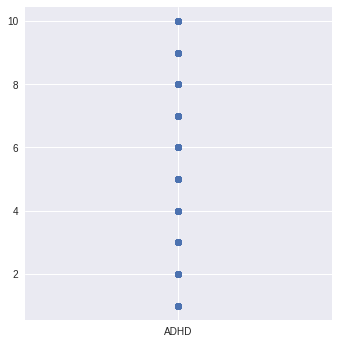

In [36]:
import seaborn as sns

sns.lmplot(x='condition',y='rating',data=adhd_df)